In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

global num_steps
num_steps = 50000
h = 0.0005

<h1>Emden–Chandrasekhar equation with Verlet's Method</h1>

In astrophysics, the Emden–Chandrasekhar equation is a dimensionless form of the Poisson equation for the density distribution of a spherically symmetric isothermal gas sphere subjected to its own gravitational force, named after Robert Emden and Subrahmanyan Chandrasekhar.

<p>$$ \frac{1}{x^2} \frac{d}{dx} \big( x^2 \frac{d\psi}{dx}\big) = e^{-\psi} $$</p>

<p>where $x$ is dimensionless radius and $\psi$ is related to the density of the gas sphere with $\rho = \rho_c e^{-\psi}$ with $\rho_c$ is the density at the centre. The initial conditions are $$ \psi(0) = \frac{d\psi}{dx}\bigg|_{x=0} = 0$$</p>

<h3>In order to understand the code below, spesifically the part with the Verlet's Step, we need to calculate the Verlet's method's iteration steps. Let's do it in class.</h3>

In [37]:
def emden_chandrasekhar_verlet():
    
    # Let's start by defining our variables in a discrete manner
    x = np.linspace(0, num_steps*h, num_steps+1)
    print(x[-1])
    psi = np.zeros(num_steps+1)
    d_psi = np.zeros(num_steps+1)
    
    # Initial conditions
    psi[0] = 0
    d_psi[0] = 0
    
    # The Verlet Step
    for n in np.arange(num_steps):
        if n==0:
            # First Verlet step
            psi[1] = psi[0] + h * d_psi[0] + h**2/2
        else:
            A = 2*psi[n] - psi[n-1] + (h*psi[n-1])/(x[n]) + h**2*np.exp(-psi[n])
            psi[n+1] = ((x[n])/(x[n]+h))*A

    # Plotting the result 
    plt.plot(x,np.exp(-psi))
    plt.xlabel('x')
    plt.ylabel('psi')
    plt.show()
    return x,psi



25.0


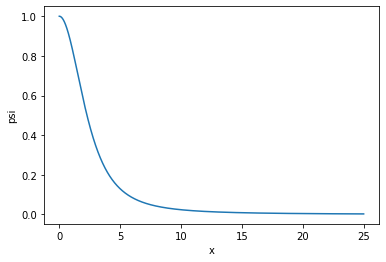

In [38]:
x,psi = emden_chandrasekhar_verlet()

Let's have a discussion on this result.

<h1>Velocity Verlet's Method</h1>

<p>Let's state as a reminder the velocity verlet algorithm. 
    $$ x[n+1] = x[n] + h x'[n] + \frac{h^2}{2} x''[n]$$
    $$ v[n+1] = v[n] + \frac{h}{2} \big( x''[n+1] - x''[n]\big)$$
</p>

Now let's try to do the calculations for this method together for the harmonic oscillator as the simple exercise. This time let's try to code it in a way it is easier to understand.

In [49]:
def a_ho(k,m,x):
    return (-k/m)*x

def x_update(x,v,a,h):
    x_updated = x + h*v + (h**2/2)*a
    return x_updated

def v_update(v,a_updated,a,h):
    v_updated = v + (h/2)*(a_updated+a)
    return v_updated

In [59]:
def ho_velocity_verlet(k,m):
    
    # Let's start by defining our variables in a discrete manner
    t = np.linspace(0, num_steps*h, num_steps+1)
    x = np.zeros(num_steps+1)
    v = np.zeros(num_steps+1)
    a = np.zeros(num_steps+1)


    # Initial conditions
    x[0] = 0
    v[0] = 1
    a[0] = a_ho(k,m,x[0])
    
    # The Verlet Step
    for n in np.arange(num_steps):
        x[n+1] = x_update(x[n],v[n],a_ho(k,m,x[n]),h)
        a[n+1] = a_ho(k,m,x[n+1])
        v[n+1] = v_update(v[n],a[n+1],a[n],h)

    # Plotting the result 
    plt.plot(t,x)
    plt.xlabel('t')
    plt.ylabel('x')
    plt.show()
    return t,x,v,a


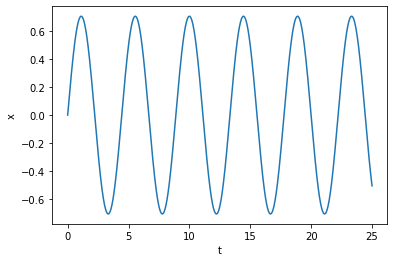

In [60]:
t,x,v,a = ho_velocity_verlet(2,1)

Can we see how the energy evolves?

In [65]:
def total_energy(v,x,k,m):
    kinetic = (1/2)*m*v**2
    potential = (1/2)*k*x**2
    return kinetic+potential

([<matplotlib.axis.YTick at 0x7fe81272f790>,
 <a list of 7 Text yticklabel objects>)

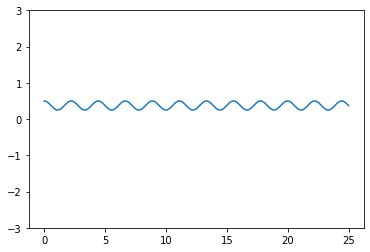

In [75]:
plt.plot(t,total_energy(v,x,1,1))
plt.yticks(range(-3, 4))


<h3>Why does the energy oscillates when we know this is a conservative system where the energy must be a constant?</h3>

We will be trying the Velocity Velret Method on a more complicated system, hands-on right now. And afterwards we will move to the Beeman Algorithm if we have time remaining.